In [1]:
import matplotlib.pyplot as plt
import numpy as np 

import rt1plot

## CADファイル(dxfファイル)入力
- 現在は'dxf_files/Main.dxf' と 'dxf_files/simple.dxf' の2種類が存在
- Main.dxfは重いの注意


DXF version: AC1021
num of lines:  8
num of circs:  0
num of arcs :  9


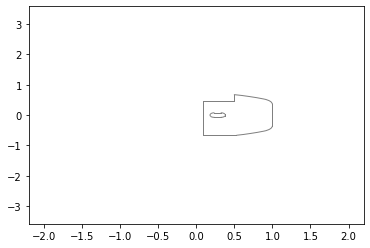

In [2]:
RT1_frame = rt1plot.Frame(dxf_file='dxf_files/simple.dxf')

fig,ax = plt.subplots()
RT1_frame.append_frame(ax)

## 定義域の配列を規定する
2Dプロットしたい定義域の範囲や解像度を配列として予め用意しておきます。

In [3]:
r = np.linspace(0.,1.1,500)
z = np.linspace(-0.7,0.7,500)
R,Z = np.meshgrid(r,z,indexing='xy')

## 容器内にのみプロットできるようにマスクを生成する
'Main.dxf'はとても時間がかかるので注意

226 249
(-0.0011022044088176354, 1.1011022044088177, -0.7014028056112225, 0.7014028056112224)


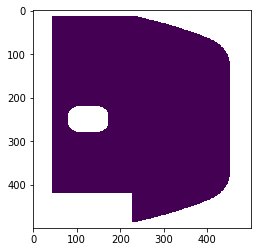

In [4]:
RT1_frame.grid_input(r,z)
extent =RT1_frame.imshow_extent # 
mask = RT1_frame.NaN_factor     # RT1フレームの外部を非表示にするためのマスク配列
print(extent)
plt.imshow(mask)

## rt1mag_npから2D磁場計算

In [5]:
Br, Bz = rt1plot.mag.bvec(R,Z)  #磁場計算
B_abs  = np.sqrt(Br**2+Bz**2)  
Psi    = rt1plot.mag.psi(R,Z)     #磁気面計算
Rc     = rt1plot.mag.curvature_2d(R,Z) #磁気面の曲率

## プロットの共通設定

In [14]:
ax_kwargs = {'xlim':( 0  , 1.1), 
             'ylim':(-0.7, 0.7),
             'aspect' : 'equal'}

im_kwargs = {'extent' : extent,
             'origin' : 'lower' }

## 磁気面のプロット

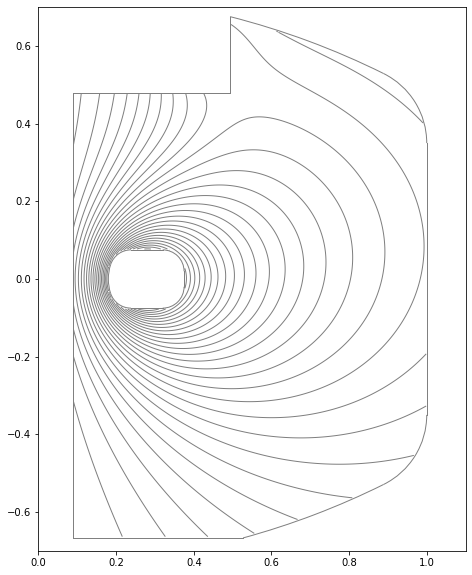

In [15]:
fig,ax = plt.subplots(figsize=(10,10)) #figuerのサイズを 10x10に

ax.set(**ax_kwargs)

ax.contour(-Psi*mask,colors='black',alpha=0.5,levels=30,linewidths=1, **im_kwargs)
RT1_frame.append_frame(ax)

## 磁場強度のプロット
imshow だとy軸が反転するので,origin='lower'が必要

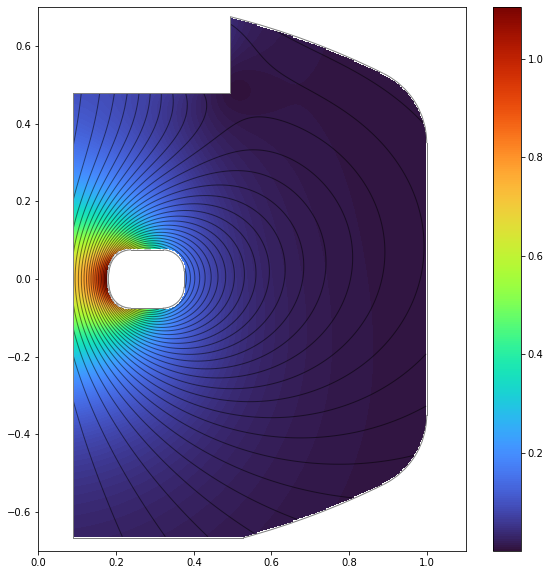

In [16]:
fig,ax = plt.subplots(figsize=(10,10)) #figuerのサイズを 10x10に

ax.set(**ax_kwargs)

cm = ax.imshow(B_abs*mask, cmap='turbo',alpha=1, **im_kwargs)
ax.contour(-Psi*mask, colors='black',alpha=0.5,levels=30,linewidths=1, **im_kwargs)
fig.colorbar(cm)
RT1_frame.append_frame(ax)


## 磁場強度のプロット2

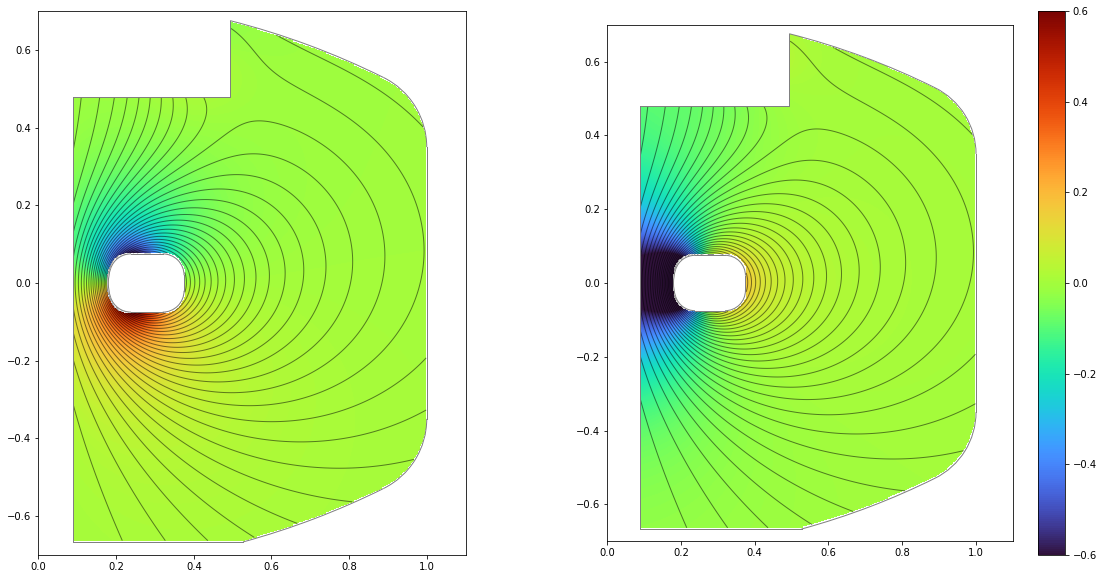

In [21]:
fig,ax = plt.subplots(1,2,figsize=(20,10)) #figuerのサイズを 10x10に


for i in range(2):
    ax[i].set(**ax_kwargs)
    ax[i].contour(-Psi*mask, colors='black',alpha=0.5,levels=30,linewidths=1, **im_kwargs)


ax[0].imshow(Br*mask,cmap='turbo',alpha=1,vmax=0.6,vmin=-0.6, **im_kwargs)
cm = ax[1].imshow(Bz*mask,cmap='turbo',alpha=1,vmax=0.6,vmin=-0.6, **im_kwargs)
fig.colorbar(cm)

RT1_frame.append_frame(ax[0])
RT1_frame.append_frame(ax[1])

## 曲率のプロット

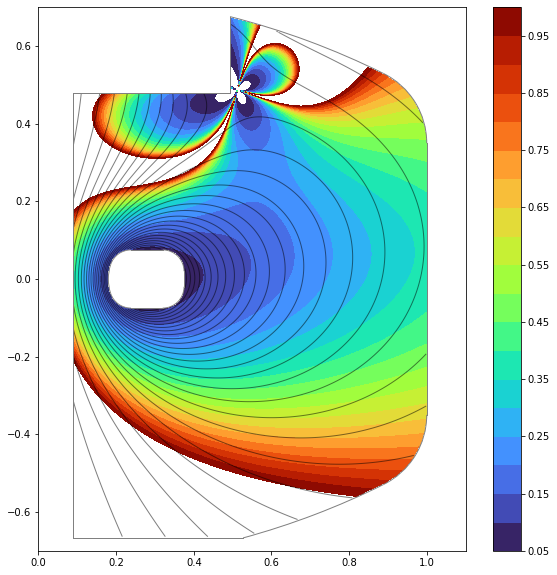

In [25]:
fig,ax = plt.subplots(figsize=(10,10)) #figuerのサイズを 10x10に

ax.set(**ax_kwargs)

cm = ax.contourf(Rc*mask,cmap='turbo',levels=np.linspace(0.05,1,20),alpha=1, **im_kwargs)
ax.contour(-Psi*mask,colors='black',alpha=0.5,levels=30,linewidths=1,**im_kwargs)
fig.colorbar(cm)
RT1_frame.append_frame(ax)


## 密度分布のプロット

In [28]:
n0 = 25.99e16*0.8/2
a  = 6.348
b  = 0.989
rmax = 0.5277
def gaussian(r,z,n0=n0,a=a,b=b,rmax=rmax):
    psi      = rt1plot.mag.psi(r,z)
    br, bz   = rt1plot.mag.bvec(r,z)
    b_abs    = np.sqrt(br**2+bz**2)
    psi_rmax = rt1plot.mag.psi(rmax,0)
    psi0     = rt1plot.mag.psi(1,0)
    b0       = rt1plot.mag.b0(r,z)
    return n0 * np.exp(-a*(psi-psi_rmax)**2/psi0**2)*(b_abs/b0)**(-b)

Ne = gaussian(R,Z)

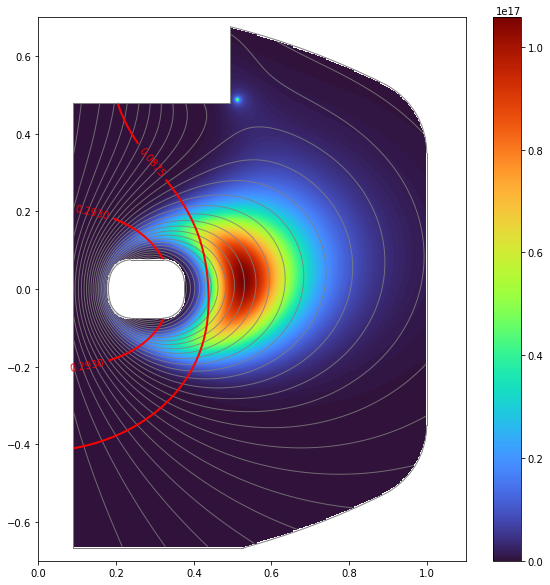

In [30]:
fig,ax = plt.subplots(figsize=(10,10)) #figuerのサイズを 10x10に

ax.set(**ax_kwargs)

cm = ax.imshow(Ne*mask,cmap='turbo',alpha=1.0, **im_kwargs)
ax.contour(-Psi*mask,colors='gray',alpha=0.8,levels=30,linewidths=1, **im_kwargs)
fig.colorbar(cm)


cnt = ax.contour(B_abs*mask,extent=extent,alpha=1.0,colors='red',levels=[0.0875,0.2930],linewidths=2)
ax.clabel(cnt,fmt='%1.4f')

RT1_frame.append_frame(ax)

### (＊)マスクなし

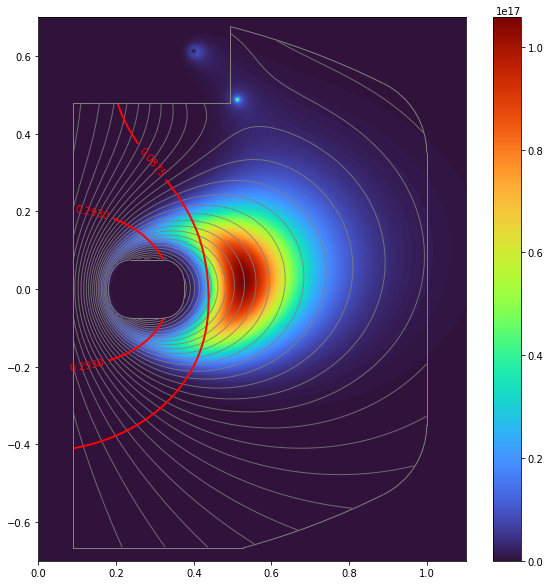

In [32]:

fig,ax = plt.subplots(figsize=(10,10)) #figuerのサイズを 10x10に

ax.set(**ax_kwargs)
    

cm = ax.imshow(Ne,extent=extent,origin='lower',cmap='turbo',alpha=1.0)
ax.contour(-Psi*mask,extent=extent,colors='gray',alpha=0.8,levels=30,linewidths=1)
fig.colorbar(cm)


cnt = ax.contour(B_abs*mask,extent=extent,alpha=1.0,colors='red',levels=[0.0875,0.2930],linewidths=2)
ax.clabel(cnt,fmt='%1.4f')

RT1_frame.append_frame(ax)